<a href="https://colab.research.google.com/github/arumajirou/-daily-test/blob/main/text2pointcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Point-E**
「**Point-E**」は、**画像**や**テキスト**から**3Dポイントクラウドを生成**するAIモデルです。

他の3D生成AIと比べ、**圧倒的に高速に3D生成**できます。
<img src="https://github.com/openai/point-e/raw/main/point_e/examples/paper_banner.gif" alt=" Point-E" title=" Point-E">

---
　非営利団体OpenAIの研究者らは、テキストから**3Dモデルを生成するAI** **「Point-E」**を開発し、GitHubでそのソースコードを公開した。

　Point-Eで生成される3Dモデル、**ポリゴン**によって**面が構成されるモデル**ではなく、**RGBで染色された複数の点が雲のように集まった集合体**による3Dモデルだ。

　**テキスト**はまず**GLIDE**と呼ばれるモデルによって見え方が合成され、そのあと**条件付された粗い点の集まり(1,024ポイント)**を生成。最後に、**4,096ポイントからなる点の集まりが生成される。**

　3Dモデルの生成は、**物体の3次元的な構造**を理解していないと行なえないため、**2Dの生成**より**難易度がはるかに高い**。そのため論文の中で失敗例も多く挙げている。研究者らは**「Point-Eはテキストから3Dを合成する技術の出発点になるだろう」**としている。
https://pc.watch.impress.co.jp/docs/news/1465560.html

---

画像生成AI「DALL-E 2」やテキスト生成AI「GPT-3」、対話AI「ChatGPT」を開発する研究団体のOpenAIが、**テキスト**から**3Dオブジェクトを生成するAI「Point-E」**をオープンソース化し、ソースコードをGitHubで公開しました。

Point-Eは主に
- **「テキストから画像を生成するモデル」**
- **「画像から点群データを生成するモデル」**

の2つで構成されています。

**テキストから画像を生成するモデル**は、Stable DiffusionやOpenAI開発のDALL-E 2などの画像生成AIと同じように、**ラベル付き画像のデータセットでテキストと視覚的概念の関連付けを理解したモデル**です。
**「画像から点群データを生成するモデル」**は、**3Dオブジェクトとセットになった画像のデータセット**から、**両者の効果的な変換を学習したモデル**です。

以下は実際に画像(左)から点群データ(右)を生成したところ。
<img src="https://i.gzn.jp/img/2022/12/21/openai-point-e/02_m.png" alt=" Point-E" title=" Point-E">

Point-Eが生成する3Dオブジェクトはポリゴンを組み合わせたものではなく、**「空間上のデータ点の離散的な集合」**、すなわち**粒子をギュッと固めたような点群データで生成**されます。そのため、Point-Eには**「点群データをポリゴンメッシュ((メッシュとは、オブジェクトを定義する頂点、辺、面の集まりで、3Dモデリングやデザインによく使われるもの）)に変換するモデル」**も含まれています。
<img src="https://i.gzn.jp/img/2022/12/21/openai-point-e/03_m.png" alt=" Point-E" title=" Point-E">

そして、Point-Eには**点群からポリゴンメッシュに変換するAI**も含まれています。点群のモデルはポリゴンメッシュよりも**高速に生成できる**ため、**3Dオブジェクトの生成が従来の600倍以上も高速化**しているとのこと。これまでNVIDIA V100で何時間もかかっていた計算がわずか**1～2分**で済むようになっているのが**Point-Eの大きな利点**です。

ただし、**物体の細かい形状や質感を捉えることができないというデメリット**があり、形状の一部分がどうしても**ブロック状**になったり**歪んでしまったり**することもあるとのこと。

以下は実際に画像から点群データの生成に失敗してしまった例。
<img src="https://i.gzn.jp/img/2022/12/21/openai-point-e/04_m.png" alt=" Point-E" title=" Point-E">

https://gigazine.net/news/20221221-openai-point-e/

---

　米AI研究企業OpenAIの研究者らは12月19日（現地時間）、**テキストプロンプトから3Dオブジェクトを生成するAIシステム「Point-E」**をオープンソース化したと発表した。

　同様のシステムとしては**米Googleの「DreamFusion」**などがあるが、発表論文によると、Point-Eは例えば**単体のGPU（米NVIDIAの「V100」）でも3Dモデルを1～2分で生成できる**という。

　Point-Eは、**点群（point cloud）で3Dオブジェクトを生成する。**名称の**「E」は点群を効率的（Efficiently）に生成する**ことに由来するという。

　**3D生成は2段階**で行われる。まず**プロンプトを入力**すると、**レンダリングされた合成ビューが生成**され、次に**点群拡散スタック**が**この画像を条件付けして3DのRGB点群を生成**する

<img src="https://image.itmedia.co.jp/news/articles/2212/21/yu_3d1.jpg" alt=" Point-E" title=" Point-E">

　「この方法は、最先端の他の類似技術よりも性能は劣る」が、**DreamFusion**のような**マルチビュー最適化ベース**の方法よりも**短時間でサンプルが生成できる**ので、**実用的になる可能性がある**としている。3Dモデルが短時間で容易に生成できるようになれば、ゲームや映画などの制作に役立ちそうだ。

In [5]:
#@title # パッケージのインストール
#git cloneとは、既存のリポジトリをローカル環境に複製するコマンドのことです。
#git clone https://github.com/[ユーザー名]/[リポジトリ名].git
!git clone https://github.com/openai/point-e.git
%cd point-e
!pip install ..

Cloning into 'point-e'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 57 (delta 3), reused 2 (delta 2), pack-reused 42
Unpacking objects: 100% (57/57), done.
/content/point-e/point-e
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/point-e
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-_z_j2q1f/clip_3ae3c1fcf1d646f892f594f2a8ed01a5
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-ins

In [6]:
#@title # ライブラリのインストール
import torch
from tqdm.auto import tqdm

from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.plotting import plot_point_cloud

# base40M-**textvec**
CLIP ViT-L/14の1つの文章方向量を条件とする4000万パラメータ（設定値）の文章から点群への計算式。この計算式は、文章記述から直接点群を生成するために使用することができますが、単純なプロンプト（命令）に対してのみ機能します。

In [24]:
#@title # GPUの選択と学習済み計算式のダウンロード
#GPUを使えるかどうかに応じてtorch.deviceオブジェクトを作成するコード
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('基本計算式を作成しています。...')
base_name = 'base40M-textvec'#CLIP ViT-L/14の1つの文章方向量を条件とする4000万パラメータ（設定値）の文章から点群への計算式
base_model = model_from_config(MODEL_CONFIGS[base_name], device)#数式設定
print("*"*100)
print("base_model(基本計算式)=",base_model)
base_model.eval()
print("*"*100)
print("base_model.eval()(基本計算式評価)=",base_model.eval())
base_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base_name])#拡散からの構成
print("*"*100)
print("base_diffusion(基本拡散)=",base_diffusion)
print('サンプル拡張計算式を作成しています...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
print("*"*100)
print("upsampler_model(サンプル拡張計算式)=",upsampler_model)
upsampler_model.eval()#サンプル拡張評価
print("*"*100)
print("upsampler_model.eval()(サンプル拡張計算式評価)=",upsampler_model.eval())
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])#サンプル拡張拡散
print("*"*100)
print("upsampler_diffusion=サンプル拡張拡散",upsampler_diffusion)
print('基本確認事項をダウンロード...')
base_model.load_state_dict(load_checkpoint(base_name, device))

print('サンプル拡張確認事項のダウンロード...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))

基本計算式を作成しています。...
****************************************************************************************************
base_model(基本計算式)= CLIPImagePointDiffusionTransformer(
  (time_embed): MLP(
    (c_fc): Linear(in_features=512, out_features=2048, bias=True)
    (c_proj): Linear(in_features=2048, out_features=512, bias=True)
    (gelu): GELU(approximate='none')
  )
  (ln_pre): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (backbone): Transformer(
    (resblocks): ModuleList(
      (0): ResidualAttentionBlock(
        (attn): MultiheadAttention(
          (c_qkv): Linear(in_features=512, out_features=1536, bias=True)
          (c_proj): Linear(in_features=512, out_features=512, bias=True)
          (attention): QKVMultiheadAttention()
        )
        (ln_1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=512, out_features=2048, bias=True)
          (c_proj): Linear(in_features=2048, out_features=512, bias=True

<All keys matched successfully>

In [8]:
#@title #  sampler(見本集)の設定
sampler = PointCloudSampler(
    device=device,
    models=[base_model, upsampler_model],
    diffusions=[base_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 0.0],
    model_kwargs_key_filter=('texts', ''), # サンプル拡張の条件は全く付けないでください
)

In [23]:
#@title # 条件となるプロンプト（命令）(命令)を設定し計算式からサンプルを作成する。
# 条件となるプロンプト（命令）(命令)を設定する。
prompt = 'a red motorcycle'#赤いオートバイ
print("*"*100)
print(prompt)
# 計算式からサンプルを作成する。
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(texts=[prompt]))):
    samples = x
    print("*"*100)
    print(samples)

a red motorcycle


0it [00:00, ?it/s]

tensor([[[-7.0262e-04, -4.8538e-02, -2.9873e-02,  ..., -4.5349e-02,
           2.4754e-02, -1.8251e-01],
         [-7.4051e-02,  1.3065e-02,  4.3549e-02,  ...,  4.6791e-02,
          -7.0320e-02, -6.7608e-02],
         [-8.2653e-02, -1.2586e-01, -8.8279e-02,  ..., -1.2814e-01,
          -5.1064e-02, -1.6612e-01],
         [ 1.9464e+02,  2.3507e+02,  2.1916e+02,  ...,  1.8525e+02,
           1.7188e+02,  1.7777e+02],
         [-6.9948e+01, -5.8785e+01, -5.7126e+01,  ..., -6.0503e+01,
          -4.4396e+01, -8.6553e+01],
         [ 4.4563e+01,  5.9180e+01,  5.3107e+01,  ...,  2.0515e+01,
           3.2106e+01, -6.3890e+00]]], device='cuda:0')
tensor([[[-1.8153e-02, -4.9990e-02, -4.2294e-02,  ..., -9.6623e-02,
          -2.8114e-03, -1.4642e-01],
         [-1.5835e-01, -3.8224e-02, -3.3150e-02,  ..., -5.9586e-02,
          -7.5882e-02, -1.1597e-01],
         [-4.9833e-02, -1.8898e-01, -1.0717e-01,  ..., -6.4171e-02,
          -8.3160e-02, -1.8530e-01],
         [ 2.0695e+02,  2.3987e+02, 

****************************************************************************************************
pc= PointCloud(coords=array([[-0.44557106, -0.01062613, -0.21544175],
       [ 0.0739239 ,  0.03935135, -0.01346664],
       [-0.3101486 , -0.03049606, -0.04010657],
       ...,
       [ 0.2296967 , -0.04162514, -0.05059576],
       [-0.03506829, -0.03912248, -0.17698558],
       [ 0.00992539, -0.09022241, -0.19844684]], dtype=float32), channels={'R': array([0.6627451, 1.       , 1.       , ..., 1.       , 0.9960785,
       0.9960785], dtype=float32), 'G': array([0.6627451 , 0.01960784, 0.02352941, ..., 0.02352941, 0.03921569,
       0.04705883], dtype=float32), 'B': array([0.6627451 , 0.02745098, 0.03137255, ..., 0.02745098, 0.04313726,
       0.0509804 ], dtype=float32)})
****************************************************************************************************
fig= Figure(576x576)
**********************************************************************************************

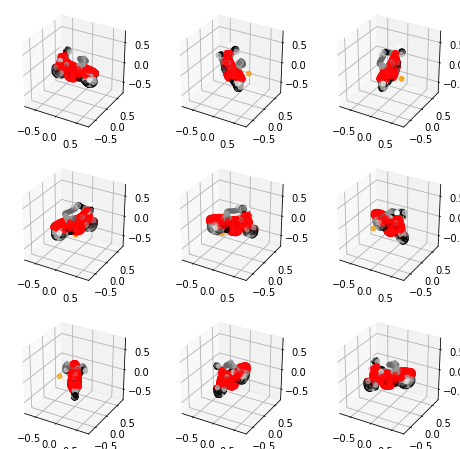

In [22]:
#@title  作成した３D点群を描画する
pc = sampler.output_to_point_clouds(samples)[0]
print("*"*100)
print("pc=",pc)
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))
print("*"*100)
print("fig=",fig)
print("*"*100)